# 10. Clustering

Acá va a ser donde todo el conocimiento que adquirimos hasta ahora se va a juntar. 

Lo que vamos a hacer es tratar de _clusterizar_ una colección de vectores en grupos o clústers de vectores que son los que estarán cerca unos de otros y todo a través de medir las distancias a pares. 

Supongamos que tenemos un grupo de $N$ $n$-vectores $x_{0},x_{1},\dots,x_{N-1}$. El objetivo de _clustering_ es agrupar (si es posible) en $k$ grupos los vectores tal que dentro de esos grupos estén lo más cerca posible unos de otros. 

![](fig1.png)

## 10.1 El objetivo de clustering

**Específicar el asignamiento de clúster**. Uno de los primeros problemas es asignar a una serie de vectores un clúster. Ahora, para empezar, vamos a partir teniendo las etiquetas $1,2,\dots,k$ que representan los clusters o grupos y estas etiquetas se las vamos a asignar a nuestros $N$ vectores usando al $N$-vector $c$, donde $c_{i}$ va a representar el grupo al que el vector $x_{i}$ está asignado. Por ejemplo, si $N=6$ y $k=3$, y además $c^{T} = [3,1,1,1,2,2]$ entonces esto significa que el vector $x_{0}$ quedará asignado al grupo $3$, los vectores $x_{1},x_{2},x_{3}$ estarán asignados al grupo $1$ y los vectores $x_{4},x_{5}$ quedarán asignados al grupo 2. Ahora, una forma alternativa de expresar esto es con conjuntos de los index de los vectores. Vamos a denotar como $G_{i}$ al grupo $i$ de indices de vectores que pertenecen a cada grupo. Continuando nuestro ejemplo entonces tenemos que

$$
G_{1} = \{1,2,3\}, \qquad G_{2} = \{4,5\}, \qquad G_{3} = \{0\}
$$

**Representativos de un grupo.** Ahora, consideremos de nuevo que tenemos $k$ grupos, a cada uno de estos grupos le vamos a asignar un vector representativo, el cual vamos a denotar por $z_{1},z_{2},\dots,z_{k}$. Estos vectores representativos pueden ser cualquier vector, no tience que ser necesariamente uno de los vectores dados sin embargo tiene que ser tal que la distancia de este $z_{i}$ a todos los otros vectores del grupo sea la mínima.

**Un objetivo de clustering.** Ahora bien, ya que definimos lo anterior podemos dar una métrica que nos ayude a juzgar la elección de un clúster en conjunto con los representativos de cada grupo. Definimos entonces:

$$
J^{clust} = (||x_{0}-z_{c_{1}}||^{2}+\cdots+||x_{N-1}-z_{c_{N}}||^{2})/N
$$

**Clustering óptimo y subóptimo.** Nosotros vamos a buscar un clustering, es decir, un asignamiento de cluster $c_{1},c_{2},\dots,c_{N}$ y vamos a elegir unos representativos $z_{1},z_{2},\dots,z_{N}$ que minimicen el objetivo $J^{clust}$. Al que nos retorne el $J^{clust}$ mínimo le vamos a llamar clustering óptimo. Aunque no existe tal solución lo que vamos a hacer es aproximarla por medio del algoritmo *k-means*, a esta solución le llamaremos *subóptima* y aunque no es solución exacta del problema es lo sufientemente buena para poder trabajar con ella. 

## 10.2 El algoritmo K-Means

**ALGORITMO** Algoritmo K-Means  
**iniciar** Se da una lista de $N$ vectores y una lista de $k$ vectores representativos $z_{1},z_{2},\dots,z_{k}$  

repetir hasta la convergencia:
1. *Parte los vectores en k-grupos*. Para cada vector $i=0,\dots,N-1$, asigna  $x_{i}$ a un grupo asociado con su representativo más cercano. 
2. *Actualiza los representativos de cada cluster*. Para cada grupo $1,\dots, k$ selecciona $z_{j}$ como el promedio de los vectores del grupo $j$.

![](it1.png)

![](it2.png)

![](it3.png)

![](it4.png)

![](it5.png)

In [22]:
def group_assignment(data,centroids):
    grouping_vec_c = np.zeros(len(data))
    for i in range(len(data)):
        dist = np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j] = np.linalg.norm(data[i] - centroids[j])
        min_dist = min(dist)
        for j in range(len(centroids)):
            if min_dist == dist[j]:
                grouping_vec_c[i] = j+1
    return grouping_vec_c

In [23]:
def update_centroid(data, grouping, centroids):
    new_centroids = [];
    for i in range(len(centroids)):
        cent = np.zeros(len(data[0]))
        count = 0
        for j in range(len(data)):
            if grouping[j] == (i+1):
                cent = cent+data[j]
                count += 1
        group_average = cent/count
        new_centroids.append(group_average)
    return new_centroids

In [24]:
def clustering_objective(data, grouping, centroids):
    J_obj = 0
    for i in range(len(data)):
        for j in range(len(centroids)):
            if grouping[i] == (j+1):
                J_obj += np.linalg.norm(data[i] - centroids[j])**2
    J_obj = J_obj/len(data)
    return J_obj

In [25]:
def Kmeans_alg(data, centroids):
    iteration = 0
    J_obj_vector = []
    Stop = False
    while Stop == False:
        grouping = group_assignment(data, centroids)
        new_centroids = update_centroid(data, grouping, centroids)
        J_obj = clustering_objective(data, grouping,new_centroids)
        J_obj_vector.append(J_obj)
        iteration += 1
        if np.linalg.norm(np.array(new_centroids) - np.array(centroids)) < 1e-6:
            Stop = True
        else:
            centroids = new_centroids
    return new_centroids, grouping, J_obj_vector, iteration

In [61]:
import matplotlib.pyplot as plt
import numpy as np

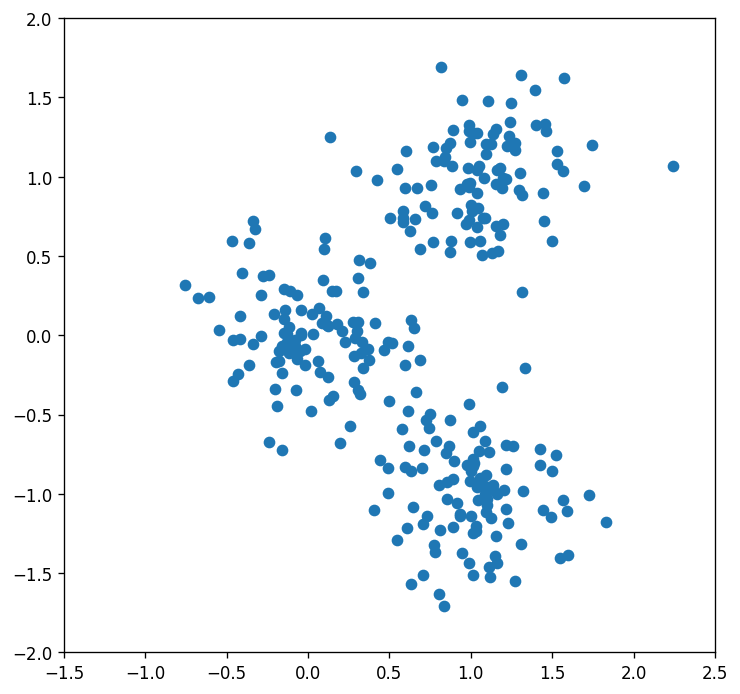

In [62]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
X = np.concatenate([[0.3*np.random.randn(2) for i in range(100)],\
                    [[1,1] + 0.3*np.random.randn(2) for i in range(100)], \
                    [[1,-1]+ 0.3* np.random.randn(2) for i in range(100)]])
ax.scatter( X[:,0],X[:,1])
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.show()

In [63]:
A = Kmeans_alg(X,X[:4])

In [64]:
A[0]

[array([1.11180744, 1.01635   ]),
 array([ 0.03540874, -0.09615733]),
 array([ 1.01160038, -0.99809159]),
 array([0.15565068, 0.57448343])]

In [65]:
A

([array([1.11180744, 1.01635   ]),
  array([ 0.03540874, -0.09615733]),
  array([ 1.01160038, -0.99809159]),
  array([0.15565068, 0.57448343])],
 array([2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
        2., 2., 2., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 4., 2., 2., 4.,
        2., 2., 2., 2., 2., 4., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2.,
        4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 4., 4., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 4., 4., 1., 4., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 4., 4., 1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 1.,

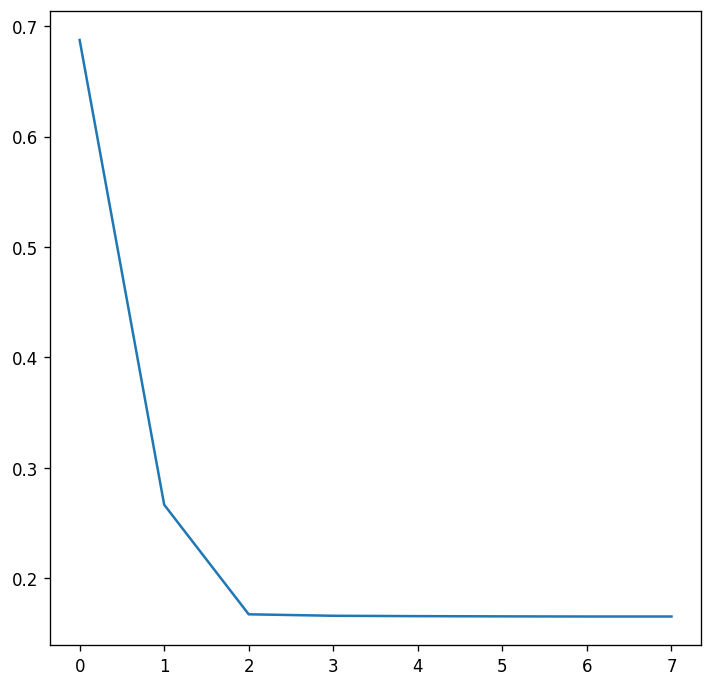

In [66]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax.plot(list(range(A[-1])),A[2])
plt.show()

In [67]:
A[1]

array([2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       2., 2., 2., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 4., 2., 2., 4.,
       2., 2., 2., 2., 2., 4., 4., 2., 2., 4., 4., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2.,
       4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 4., 4., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 4., 4., 1., 4., 1., 1., 1., 1., 4., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 4., 4., 1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [70]:
len(A[1])

300

In [75]:
A[1][3]

4.0

In [68]:
# Guardo en las listas G_1, G_2 y G_3 la posicion en la que estan los valores 1,2 o 3 de mi array A[1]
G_1 = []
G_2 = []
G_3 = []
G_4 = []
for i in range(len(A[1])):
    if A[1][i] == 1:
        G_1.append(i)
    elif A[1][i] == 2:
        G_2.append(i)
    elif A[1][i] == 3:
        G_3.append(i)
    elif A[1][i] == 4:
        G_4.append(i)
        
# Separar los datos para poder graficarlos
X_1 = [X[:,0][G_1[i]] for i in range(len(G_1))]
Y_1 = [X[:,1][G_1[i]] for i in range(len(G_1))]

X_2 = [X[:,0][G_2[i]] for i in range(len(G_2))]
Y_2 = [X[:,1][G_2[i]] for i in range(len(G_2))]

X_3 = [X[:,0][G_3[i]] for i in range(len(G_3))]
Y_3 = [X[:,1][G_3[i]] for i in range(len(G_3))]

X_4 = [X[:,0][G_4[i]] for i in range(len(G_4))]
Y_4 = [X[:,1][G_4[i]] for i in range(len(G_4))]



In [78]:
G_1[1]

101

In [36]:
(len(A[1]))

300

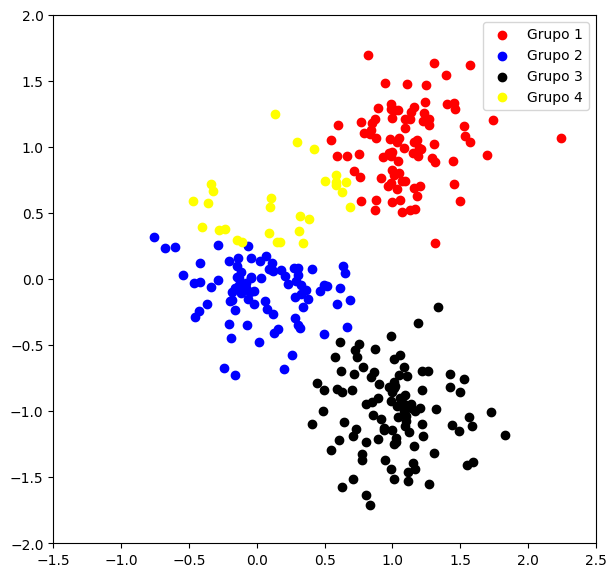

In [81]:
fig,ax = plt.subplots(1,1,figsize=(7,7),dpi=100)

ax.scatter( X_1, Y_1, color='red', label='Grupo 1')
ax.scatter( X_2, Y_2, color='blue', label='Grupo 2')
ax.scatter( X_3, Y_3, color='black', label='Grupo 3')
ax.scatter( X_4, Y_4, color='yellow', label='Grupo 4')
ax.set_xlim(-1.5,2.5)
ax.set_ylim(-2,2)
plt.legend()
plt.show()

In [13]:
from sklearn.datasets import fetch_openml
import random

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [15]:
A = Kmeans_alg(X,random.choices(X,k=9))

In [16]:
import itertools

In [17]:
a = list(itertools.product(list(range(3)),list(range(3))))

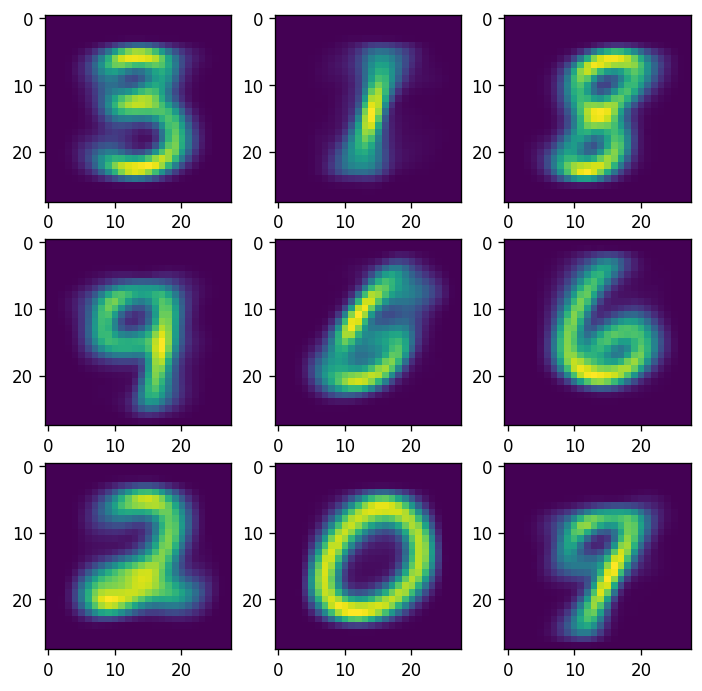

In [18]:
fig, ax = plt.subplots(3,3,figsize=(7,7),dpi=120)
for i,j in zip(a,A[0]):
        ax[i[0]][i[1]].imshow(j.reshape(28,28))
plt.show()